In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
Data_T=pd.read_csv("C:\\Users\\mm\\Desktop\\train.csv")
Data_members=pd.read_csv("C:\\Users\\mm\\Desktop\\members.csv")
Data_song_e=pd.read_csv("C:\\Users\\mm\\Desktop\\song_extra_info.csv")
Data_songs=pd.read_csv("C:\\Users\\mm\\Desktop\\songs.csv")

In [3]:
Data_T.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [4]:
Data_members.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


In [5]:
Data_song_e.head(10)

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
5,QU8f6JR0/cwLGSqJX2XDVzFK0DxMaIUY15ALJXK7ziw=,Our Time,GBAYE1400079
6,O1Oj4CmnZhbHl7oyBaHSpGeu5gvcSmUydY3Awmv3uxk=,癢,HKUM70704066
7,Tr5R61AuEkN8UelOCzu09ZwQi7/HmP9sQmxf9rFngIg=,Aloha| E Komo Mai (Theme Song from Lilo & Stit...,USWD10423930
8,ie9l12ZYXEaP4evrBBUvnNnZGdupHSX5NU+tEqB1SDg=,每天愛你多一些,HKA610200010
9,6mICNlckUVGuoK/XGC7bnxXf5s2ZnkpFHShaGL/zM2Y=,你是你的,TWI431000103


In [6]:
Data_songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [7]:
merge_1 =Data_T.merge(Data_song_e,on="song_id",how="left")

In [8]:
merge_2=Data_songs.merge(merge_1,on="song_id",how="left")

In [9]:
Song=Data_members.merge(merge_2,on="msno",how="left")

In [10]:
Song.shape

(7380952, 20)

In [11]:
Song.isna().sum()

msno                            0
city                            0
bd                              0
gender                    2964246
registered_via                  0
registration_init_time          0
expiration_date                 0
song_id                      3648
song_length                  3648
genre_ids                  121989
artist_name                  3648
composer                  1679240
lyricist                  3182332
language                     3684
source_system_tab           28497
source_screen_name         418444
source_type                 25187
target                       3648
name                         5105
isrc                       581497
dtype: int64

In [12]:
Song.dropna(inplace=True)

In [13]:
Song.shape

(2199255, 20)

In [14]:
Song.isna().sum()

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
song_id                   0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
name                      0
isrc                      0
dtype: int64

In [15]:
Song.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,source_system_tab,source_screen_name,source_type,target,name,isrc
1207,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,gG3/58uZyyOwaPT+eGWL81mwCzcDPW2EmwYcjWmvJSs=,226742.0,465,五月天 (Mayday),阿信,阿信,3.0,search,Online playlist more,online-playlist,0.0,私奔到月球,TWK230700701
1209,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,LBFRdBacp7Ob6Ada2N7uCQ47DhiNT2KjUtwOA7oSm7I=,262164.0,458,孫盛希 (Shi Shi),孫盛希 / MATZKA,林婉瑜,3.0,discover,Unknown,online-playlist,0.0,迷些路 (Lost On The Way),TWA451601607
1210,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,2CZuoLe9cm/VYMTYzLdKwXPN+BaXv7OJHIcGThl4WC8=,312528.0,921|465,[逆轉勝] 五月天∕怪獸 原聲原創紀 ([Second Chance] Soundtrack...,五月天怪獸,五月天阿信/五月天怪獸,3.0,search,Search,song,0.0,九號球,TWK231408505
1211,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,EFLnxRnjLVc4YJ4WvHGPP3S+KW5Y19VWA/ky469TC2A=,218984.0,465,蕭敬騰 (Jam Hsiao),陳奐仁,曹宇棠,3.0,radio,Radio,radio,0.0,鈴鈴,TWA531474112
1212,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,219324.0,458,周湯豪 (NICKTHEREAL),周湯豪,周湯豪\崔惟楷,3.0,search,Search,song,1.0,帥到分手,TWAG11600306
1213,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,80iDK935uwahO29c3LsulgZK0nO4201EHtJG8P8hynU=,281936.0,465,陳奕迅 (Eason Chan),李峻一,何啟弘,3.0,search,Search,song,0.0,聖誕結,HKD250332201
1214,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,wVyFY6tmkyscQuCGAKKm3nmw8VkP6mgoV0EgFS4AHWE=,199645.0,458,蔡旻佑 (Evan Yo),Evan Yo,Evan Yo,3.0,search,Search,song,0.0,我回來了 (Wo Hui Lai Liao),TWE210801011
1215,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=,185295.0,451,陳奕迅 (Eason Chan),Tang Han Xiao,Tang Han Xiao,3.0,search,Album more,album,1.0,讓我留在你身邊,HKJ631603001
1217,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,XxxvorxAdKFx6N+Be9cOe6jQWH1cncEcG1/urrZfeX0=,240698.0,465,陳奕迅 (Eason Chan),徐偉賢,林夕,3.0,search,Search,song,0.0,想哭,HKD250231307
1218,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,lq1IDPlzEF6N//1RZc5Gg5jDopI6HLg7obhf5kXMxUA=,258902.0,465,陳奕迅 (Eason Chan),陳建寧+陳政卿,許常德,3.0,search,Search,song,1.0,婚禮的祝福,TWA379921001


C:\Users\mm\AppData\Local\Temp\ipykernel_12740\1477441306.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Song.corr(),annot=True)


<Axes: >

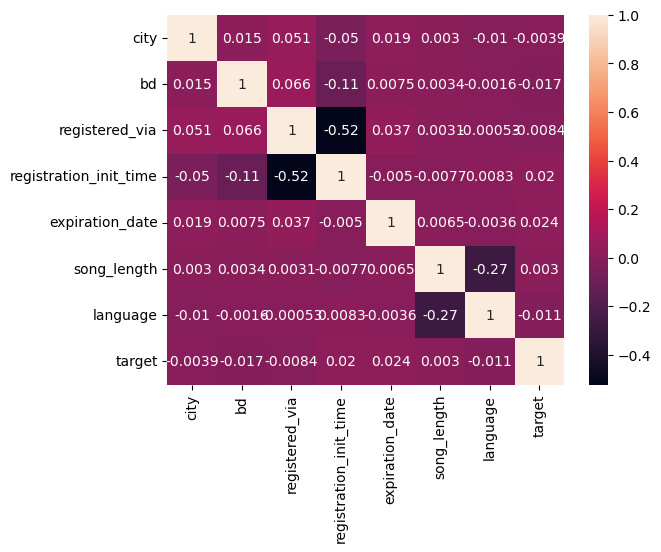

In [16]:
sns.heatmap(Song.corr(),annot=True)

<Axes: xlabel='gender'>

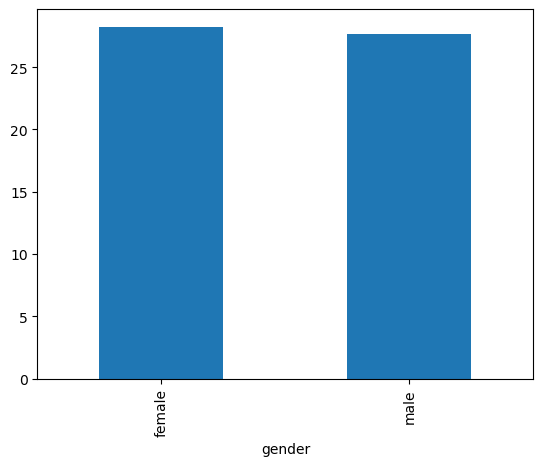

In [17]:
Song.groupby("gender")["bd"].mean().plot(kind="bar")

In [18]:
d={'male':1,'female':0}
Song['gender']=Song['gender'].map(d)

<Axes: >

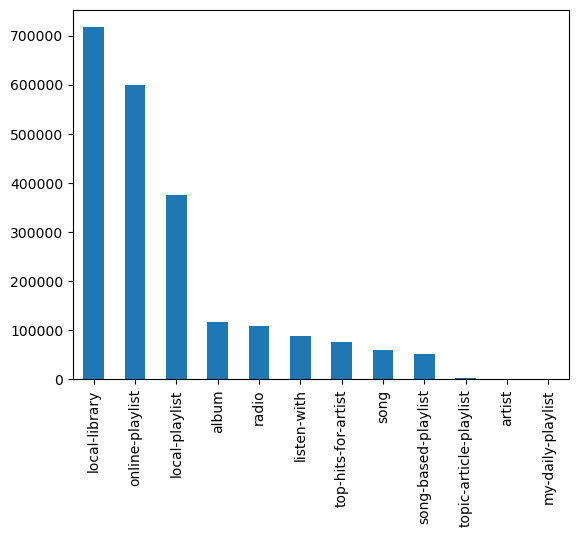

In [20]:
Song['source_type'].value_counts().plot.bar()

<Axes: >

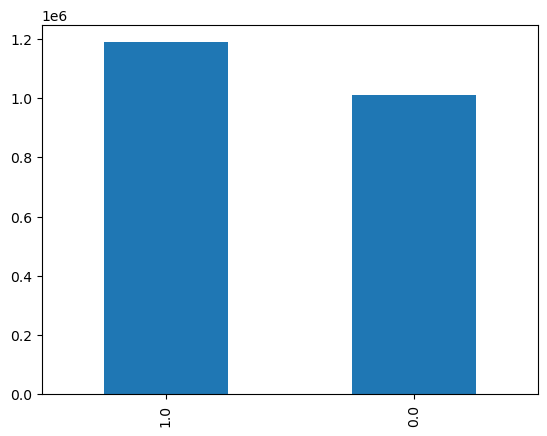

In [26]:
Song['target'].value_counts().plot.bar()

C:\Users\mm\AppData\Local\Temp\ipykernel_12740\1892187870.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Song['target'])


<Axes: xlabel='target', ylabel='Density'>

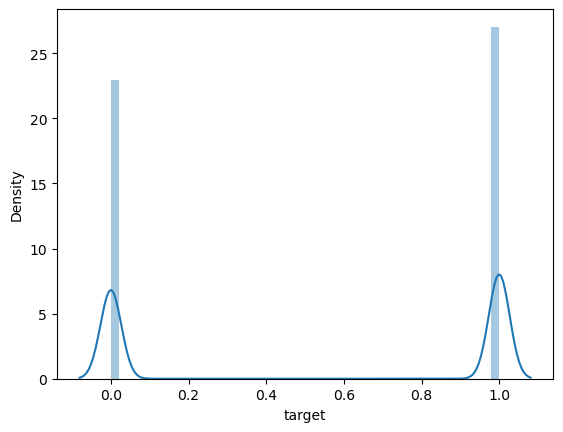

In [27]:
sns.distplot(Song['target'])

<Axes: ylabel='Density'>

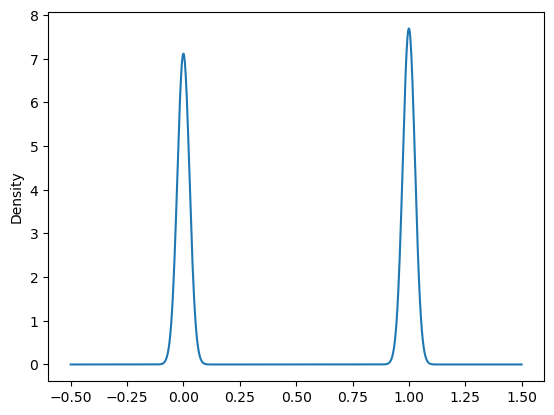

In [43]:
Song["gender"].plot(kind="density")

In [42]:
training_data=Song[["city","bd","registered_via","registration_init_time","expiration_date","song_length","language","gender"]]
testing_Data=Song["target"]
x_train,x_test,y_train,y_test=train_test_split(training_data,testing_Data,random_state=42,test_size=0.2)

In [43]:
Boost=GradientBoostingClassifier(random_state=0)
Boost.fit(x_train,y_train)

GradientBoostingClassifier(random_state=0)

In [47]:
Boost.score(x_train,y_train)

0.5620715878786225

In [51]:
Tree=DecisionTreeClassifier()
Tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
Tree.score(x_train,y_train)

0.9847232358230401